## Data preparation and EDA

In this section i clean and prepare the dataset for the model which involves the following steps:

- Download the data from the given link.
- Reformat categorical columns (status, home, marital, records, and job) by mapping with appropriate values.
- Replace the maximum value of income, assests, and debt columns with NaNs.
- Replace the NaNs in the dataframe with 0 (will be shown in the next lesson).
- Extract only those rows in the column status who are either ok or default as value.
- Split the data in a two-step process which finally leads to the distribution of 60% train, 20% validation, and 20% test sets with random seed to 11.
- Prepare target variable status by converting it from categorical to binary, where 0 represents ok and 1 represents default.
- Finally delete the target variable from the train/val/test dataframe.


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [80]:
data=pd.read_csv("/Users/victoroshimua/Machine-learning-zoomcamp-/DATA/credit_risk.csv")

In [81]:
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [82]:
data.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')

In [83]:
data.columns=data.columns.str.lower()

In [84]:
data.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [85]:
data["status"]=data.status.map({1:"ok",2:"default",0:"unk"})
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [86]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

data.home = data.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

data.marital = data.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

data.records = data.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

data.job = data.job.map(job_values)


In [87]:
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [88]:
data.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [89]:
### according to the data description from where i downloaded it, 999999999 represents a mising value
## To make it show.
for c in ["income","assets","debt"]:
    data[c] = data[c].replace(99999999,np.nan)


In [90]:
data.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [91]:
data.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [92]:
data.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [93]:
data=data[data.status != "unk"].reset_index(drop=True)

In [94]:
data.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
data["status"]=(data["status"]=="default").astype(int)
data["status"]

0       0
1       0
2       1
3       0
4       0
       ..
4449    1
4450    0
4451    1
4452    0
4453    0
Name: status, Length: 4454, dtype: int64

In [97]:
data_full_train,data_test = train_test_split(data,test_size=0.2,random_state=11)
data_train,data_val=train_test_split(data_full_train,test_size=0.25,random_state=11)
len(data_train), len(data_val),len(data_test)

(2672, 891, 891)

In [98]:
data_train=data_train.reset_index(drop=True)
data_test=data_test.reset_index(drop=True)
data_val=data_val.reset_index(drop=True)

In [99]:
data_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,0,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,0,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,0,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,0,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,0,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


In [100]:
Y_train=data_train["status"].values
Y_test=data_test["status"].values
Y_val=data_val["status"].values

In [101]:
len(Y_test),len(Y_val)

(891, 891)

In [102]:
del data_train["status"]
del data_test["status"]
del data_val["status"]

In [103]:
data_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## Decision trees

In [104]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'
# decision trees in without Scikit learn

In [105]:
dt=data_train.iloc[0].to_dict()
assess_risk(dt)

'ok'

In [106]:
for i in range(2672):
    dt = data_train.iloc[i].to_dict()
    risk_level = assess_risk(dt)
    print("Risk level for client", i+1, ":", risk_level)


Risk level for client 1 : ok
Risk level for client 2 : ok
Risk level for client 3 : default
Risk level for client 4 : default
Risk level for client 5 : default
Risk level for client 6 : ok
Risk level for client 7 : default
Risk level for client 8 : default
Risk level for client 9 : default
Risk level for client 10 : default
Risk level for client 11 : ok
Risk level for client 12 : default
Risk level for client 13 : default
Risk level for client 14 : default
Risk level for client 15 : default
Risk level for client 16 : default
Risk level for client 17 : default
Risk level for client 18 : default
Risk level for client 19 : default
Risk level for client 20 : default
Risk level for client 21 : default
Risk level for client 22 : default
Risk level for client 23 : default
Risk level for client 24 : default
Risk level for client 25 : ok
Risk level for client 26 : default
Risk level for client 27 : default
Risk level for client 28 : default
Risk level for client 29 : ok
Risk level for client 30

Risk level for client 287 : default
Risk level for client 288 : default
Risk level for client 289 : default
Risk level for client 290 : default
Risk level for client 291 : ok
Risk level for client 292 : default
Risk level for client 293 : ok
Risk level for client 294 : default
Risk level for client 295 : ok
Risk level for client 296 : ok
Risk level for client 297 : default
Risk level for client 298 : default
Risk level for client 299 : default
Risk level for client 300 : default
Risk level for client 301 : ok
Risk level for client 302 : default
Risk level for client 303 : ok
Risk level for client 304 : default
Risk level for client 305 : default
Risk level for client 306 : default
Risk level for client 307 : ok
Risk level for client 308 : ok
Risk level for client 309 : default
Risk level for client 310 : default
Risk level for client 311 : ok
Risk level for client 312 : default
Risk level for client 313 : default
Risk level for client 314 : default
Risk level for client 315 : default
R

Risk level for client 617 : default
Risk level for client 618 : ok
Risk level for client 619 : default
Risk level for client 620 : ok
Risk level for client 621 : ok
Risk level for client 622 : default
Risk level for client 623 : default
Risk level for client 624 : default
Risk level for client 625 : ok
Risk level for client 626 : default
Risk level for client 627 : default
Risk level for client 628 : ok
Risk level for client 629 : default
Risk level for client 630 : ok
Risk level for client 631 : ok
Risk level for client 632 : default
Risk level for client 633 : ok
Risk level for client 634 : default
Risk level for client 635 : default
Risk level for client 636 : default
Risk level for client 637 : default
Risk level for client 638 : ok
Risk level for client 639 : default
Risk level for client 640 : default
Risk level for client 641 : ok
Risk level for client 642 : default
Risk level for client 643 : default
Risk level for client 644 : default
Risk level for client 645 : default
Risk l

Risk level for client 883 : default
Risk level for client 884 : default
Risk level for client 885 : default
Risk level for client 886 : default
Risk level for client 887 : ok
Risk level for client 888 : default
Risk level for client 889 : ok
Risk level for client 890 : ok
Risk level for client 891 : default
Risk level for client 892 : default
Risk level for client 893 : default
Risk level for client 894 : ok
Risk level for client 895 : ok
Risk level for client 896 : ok
Risk level for client 897 : ok
Risk level for client 898 : ok
Risk level for client 899 : ok
Risk level for client 900 : ok
Risk level for client 901 : default
Risk level for client 902 : default
Risk level for client 903 : ok
Risk level for client 904 : ok
Risk level for client 905 : ok
Risk level for client 906 : ok
Risk level for client 907 : ok
Risk level for client 908 : ok
Risk level for client 909 : default
Risk level for client 910 : default
Risk level for client 911 : default
Risk level for client 912 : default


Risk level for client 1226 : default
Risk level for client 1227 : default
Risk level for client 1228 : ok
Risk level for client 1229 : ok
Risk level for client 1230 : ok
Risk level for client 1231 : default
Risk level for client 1232 : default
Risk level for client 1233 : ok
Risk level for client 1234 : ok
Risk level for client 1235 : default
Risk level for client 1236 : default
Risk level for client 1237 : ok
Risk level for client 1238 : default
Risk level for client 1239 : default
Risk level for client 1240 : default
Risk level for client 1241 : default
Risk level for client 1242 : ok
Risk level for client 1243 : default
Risk level for client 1244 : default
Risk level for client 1245 : ok
Risk level for client 1246 : ok
Risk level for client 1247 : ok
Risk level for client 1248 : ok
Risk level for client 1249 : default
Risk level for client 1250 : default
Risk level for client 1251 : default
Risk level for client 1252 : ok
Risk level for client 1253 : default
Risk level for client 12

Risk level for client 1577 : ok
Risk level for client 1578 : default
Risk level for client 1579 : default
Risk level for client 1580 : ok
Risk level for client 1581 : ok
Risk level for client 1582 : ok
Risk level for client 1583 : default
Risk level for client 1584 : default
Risk level for client 1585 : default
Risk level for client 1586 : ok
Risk level for client 1587 : default
Risk level for client 1588 : default
Risk level for client 1589 : default
Risk level for client 1590 : default
Risk level for client 1591 : default
Risk level for client 1592 : default
Risk level for client 1593 : ok
Risk level for client 1594 : default
Risk level for client 1595 : default
Risk level for client 1596 : default
Risk level for client 1597 : default
Risk level for client 1598 : default
Risk level for client 1599 : default
Risk level for client 1600 : default
Risk level for client 1601 : ok
Risk level for client 1602 : default
Risk level for client 1603 : default
Risk level for client 1604 : ok
Risk

Risk level for client 1923 : default
Risk level for client 1924 : default
Risk level for client 1925 : default
Risk level for client 1926 : default
Risk level for client 1927 : default
Risk level for client 1928 : ok
Risk level for client 1929 : ok
Risk level for client 1930 : default
Risk level for client 1931 : ok
Risk level for client 1932 : ok
Risk level for client 1933 : default
Risk level for client 1934 : default
Risk level for client 1935 : ok
Risk level for client 1936 : default
Risk level for client 1937 : default
Risk level for client 1938 : ok
Risk level for client 1939 : default
Risk level for client 1940 : default
Risk level for client 1941 : ok
Risk level for client 1942 : ok
Risk level for client 1943 : ok
Risk level for client 1944 : default
Risk level for client 1945 : default
Risk level for client 1946 : ok
Risk level for client 1947 : default
Risk level for client 1948 : default
Risk level for client 1949 : default
Risk level for client 1950 : default
Risk level for

Risk level for client 2289 : default
Risk level for client 2290 : ok
Risk level for client 2291 : default
Risk level for client 2292 : ok
Risk level for client 2293 : default
Risk level for client 2294 : default
Risk level for client 2295 : default
Risk level for client 2296 : default
Risk level for client 2297 : default
Risk level for client 2298 : default
Risk level for client 2299 : default
Risk level for client 2300 : ok
Risk level for client 2301 : default
Risk level for client 2302 : ok
Risk level for client 2303 : default
Risk level for client 2304 : default
Risk level for client 2305 : default
Risk level for client 2306 : default
Risk level for client 2307 : ok
Risk level for client 2308 : ok
Risk level for client 2309 : default
Risk level for client 2310 : default
Risk level for client 2311 : default
Risk level for client 2312 : default
Risk level for client 2313 : ok
Risk level for client 2314 : default
Risk level for client 2315 : ok
Risk level for client 2316 : ok
Risk leve

Risk level for client 2659 : default
Risk level for client 2660 : ok
Risk level for client 2661 : ok
Risk level for client 2662 : default
Risk level for client 2663 : default
Risk level for client 2664 : ok
Risk level for client 2665 : default
Risk level for client 2666 : default
Risk level for client 2667 : default
Risk level for client 2668 : ok
Risk level for client 2669 : default
Risk level for client 2670 : default
Risk level for client 2671 : ok
Risk level for client 2672 : ok


In [107]:
#decision tree with scikit learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [108]:
train_dicts=data_train.fillna(0).to_dict(orient="records")
dv=DictVectorizer(sparse=False)
dv.fit(train_dicts)
X_train=dv.transform(train_dicts)


In [109]:

dv.get_feature_names()

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [110]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [111]:
val_dicts=data_val.fillna(0).to_dict(orient="records")
X_val=dv.transform(val_dicts)

In [112]:
y_pred=dt.predict_proba(X_val)[:,1]
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0.

In [113]:
roc_auc_score(Y_val,y_pred)
#low score here 

0.6485190477343731

In [114]:
## checking for roc_auc_score of the train data
pred_1= dt.predict_proba(X_train)[:,1]
roc_auc_score(Y_train,pred_1)

1.0

## The model did learn well on the train data but failed to predict well on unseen data this is (OVERFITTING)

In [115]:
## To solve overfiting in decision trees, i have to change the number of trees or train a decision stump

In [116]:
dtm=DecisionTreeClassifier(max_depth=3)
dtm.fit(X_train,Y_train)
y_pred=dtm.predict_proba(X_val)[:,1]
y_pred

array([0.11690761, 0.11690761, 0.26356589, 0.11690761, 0.11690761,
       0.3875969 , 0.11690761, 0.76811594, 0.11690761, 0.11690761,
       0.11690761, 0.11690761, 0.11690761, 0.11690761, 0.26356589,
       0.60294118, 0.11690761, 0.60829493, 0.11690761, 0.11690761,
       0.11690761, 0.3875969 , 0.11690761, 0.3875969 , 0.60829493,
       0.48387097, 0.60829493, 0.11690761, 0.60829493, 0.11690761,
       0.48387097, 0.11690761, 0.11690761, 0.11690761, 0.11690761,
       0.11690761, 0.76811594, 0.60829493, 0.60829493, 0.76811594,
       0.11690761, 0.76811594, 0.11690761, 0.11690761, 0.11690761,
       0.11690761, 0.76811594, 0.11690761, 0.11690761, 0.11690761,
       0.11690761, 0.11690761, 0.11690761, 0.11690761, 0.3875969 ,
       0.11690761, 0.11690761, 0.3875969 , 0.11690761, 0.11690761,
       0.11690761, 0.11690761, 0.26356589, 0.26356589, 0.11690761,
       0.3875969 , 0.26356589, 0.11690761, 0.11690761, 0.11690761,
       0.11690761, 0.11690761, 0.11690761, 0.11690761, 0.11690

In [117]:
roc_auc_score(Y_val,y_pred)

0.7389079944782155

In [118]:
pred_1= dtm.predict_proba(X_train)[:,1]
roc_auc_score(Y_train,pred_1)

0.7761016984958594

In [119]:
### here the model is better and does not over fit after changing the number of dept

In [120]:
print(export_text(dt, feature_names=dv.get_feature_names()))
### Decision trees with plenty layers

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- home=parents <= 0.50
|   |   |   |   |   |   |   |--- seniority <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- seniority >  0.50
|   |   |   |   |   |   |   |   |--- price <= 1457.50
|   |   |   |   |   |   |   |   |   |--- expenses <= 55.00
|   |   |   |   |   |   |   |   |   |   |--- home=other <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- home=other >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- expenses >  55.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- price >  1457.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- h

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [121]:
##decision tree with only three layers
print(export_text(dtm, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0



### Decision trees parameter tuning

* selecting max_depth = numbers of rules 
* selecting min_samples_leaf = numbers of samples in each leaf nodes
###### These are the two best parameters for a Decision tree 

###### selecting max_depth that brings higher accuracy

In [122]:
for d in [1,2,3,4,5,6,7,10,15,20,None,100]:# setting figures for max_depth(none means any of number dept)
    dtc=DecisionTreeClassifier(max_depth=d)
    dtc.fit(X_train,Y_train)
    
    y_pred=dtc.predict_proba(X_val)[:,1]
    auc=roc_auc_score(Y_val,y_pred)
    
    print("For Max_dept {d}, auc_score = {a}".format(d=d,a=auc) )


For Max_dept 1, auc_score = 0.6058644740984719
For Max_dept 2, auc_score = 0.6685264343319367
For Max_dept 3, auc_score = 0.7389079944782155
For Max_dept 4, auc_score = 0.7612827250490422
For Max_dept 5, auc_score = 0.7669377103969388
For Max_dept 6, auc_score = 0.7511412898694629
For Max_dept 7, auc_score = 0.7467335496839504
For Max_dept 10, auc_score = 0.6816830544186385
For Max_dept 15, auc_score = 0.6641338306168414
For Max_dept 20, auc_score = 0.6645243515536073
For Max_dept None, auc_score = 0.6602346758373496
For Max_dept 100, auc_score = 0.6662953185924293


In [123]:
## from here i can see the best parameter for max_depth is between 4 to 6,but 5 is the highest

###### selecting min_sample_leaf and max_depth that brings higher accuracy

In [124]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, Y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(Y_val, y_pred)
        
        scores.append((depth, s, auc))

In [125]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910
5,4,500,0.679842
6,4,100,0.755937
7,4,200,0.747260
8,5,1,0.766496
9,5,5,0.768173


In [126]:
### to know the parameter with the higest accuracy using pivot tables
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.766  0.762
5                 0.761  0.768  0.762
10                0.761  0.762  0.778
15                0.764  0.772  0.785
20                0.761  0.774  0.773
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

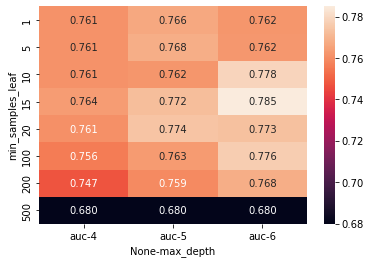

In [127]:
import seaborn as sns
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [128]:
### from the pivot table it can be seen that the parameters with the highest roc_auc score is max_depth=6 and min_samples_leaf=15

In [129]:
# using the best parameters to tune the model
dt=DecisionTreeClassifier(max_depth=6,min_samples_leaf=15)
dt.fit(X_train, Y_train)
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  20.00
|   |   |   |   |   |--- expenses <= 71.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- expenses >  71.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- debt <= 1600.00
|   |   |   |   |   |--- seniority <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- seniority >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- debt >  1600.00
|   |   |   |   |   |--- class: 1
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   |   |   |   |--- amount <= 1330.00
|   |   |   |   |   |--- assets <= 3326.00
|   |   |   |   |   |   |--- clas

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Ensemble and random forest 

In [130]:
from sklearn.ensemble import RandomForestClassifier


In [131]:
rf=RandomForestClassifier(n_estimators=10)

In [132]:
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

In [133]:
y_pred=rf.predict_proba(X_val)[:,1]

In [134]:
score=roc_auc_score(Y_val,y_pred)

In [135]:
score

0.791604102588942

#### Random forest parameter tuning
* max_depth	
* n_estimators
* min_sample_leafs

In [136]:
# using different extimators
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, Y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(Y_val, y_pred)
    
    scores.append((n, auc))

In [137]:
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910


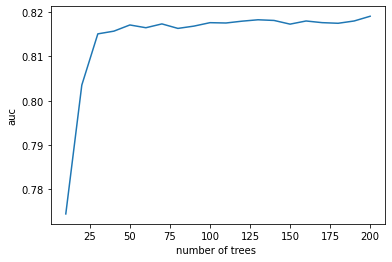

In [138]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel("number of trees ")
plt.ylabel("auc")
plt.show()


In [139]:
### using different max depth
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, Y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(Y_val, y_pred)

        scores.append((d, n, auc))
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)


In [140]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878
5,5,60,0.801167
6,5,70,0.802251
7,5,80,0.803244
8,5,90,0.803616
9,5,100,0.804452


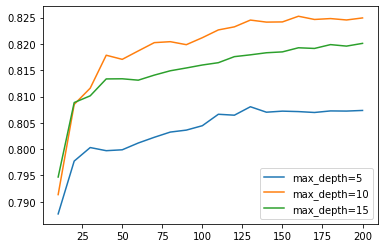

In [141]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [142]:
### best max dept
max_depth=10

In [143]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, Y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(Y_val, y_pred)

        scores.append((s, n, auc))


In [144]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head(1)

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365


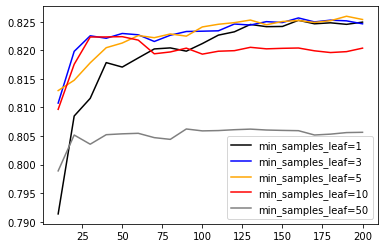

In [145]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [146]:
### best min_samples_leaf
min_samples_leaf = 3


In [147]:
###using the best parameters
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, Y_train)
RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

Other useful parametes:
* max_features
* bootstrap


### Gradient boosting and Xgboost

In [148]:
!pip install xgboost

In [149]:
import xgboost as xgb

In [150]:
features=dv.get_feature_names()
d_train=xgb.DMatrix(X_train,label=Y_train,feature_names=features)

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [151]:
d_val=xgb.DMatrix(X_val,label=Y_val,feature_names=features)

In [152]:
# to know more about the parameters check the xgboost documentation 
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, d_train, num_boost_round=10)


In [153]:
y_pred=model.predict(d_val)

In [154]:
roc_auc_score(Y_val,y_pred)

0.8152745150274878

In [155]:
%%capture output

UsageError: %%capture is a cell magic, but the cell body is empty.


In [ ]:
watchlist = [(d_train, 'train'), (d_val, 'val')]

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, d_train, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
s = output.stdout
print(s[:200])

###### could not continue because my jupyter notebook fails to run the capture magic funtion, i wil come bact to it later

### Selecting the final model
* After all the training i will select between decision tree,random forest or gradient boost based on thier roc score after using the best parameter tuning 
* Then train final model with the entire training dataset(df_full_train)
* save the model


In [ ]:
# best decision tree
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, Y_train)

In [ ]:
y_pred=dt.predict_proba(X_val)[:,1]
roc_auc_score(Y_val,y_pred)

In [ ]:
## best random forest
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, Y_train)

In [ ]:
y_pred=rf.predict_proba(X_val)[:,1]
roc_auc_score(Y_val,y_pred)

In [ ]:
## best Xgboost model
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, d_train, num_boost_round=175)


In [ ]:
y_pred=model.predict(d_val)
roc_auc_score(Y_val,y_pred)

### from here i can see the best performing model is the Xgboost model

## Next i will train the full train dataset(data_full_train) with xgboost model(best model)

In [156]:
data_full_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3668,0,22,owner,48,48,married,no,fixed,60,110.0,3000.0,0.0,1000,1460
2540,1,8,other,60,41,married,no,freelance,45,62.0,0.0,0.0,1800,2101
279,0,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
3536,0,1,owner,12,61,married,no,others,45,103.0,20000.0,0.0,300,650
3866,0,13,owner,60,27,married,no,fixed,35,253.0,7000.0,0.0,1060,1750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,1,4,owner,60,47,married,no,freelance,75,0.0,13500.0,0.0,1900,1976
1293,0,2,rent,60,28,single,no,fixed,45,101.0,0.0,0.0,1300,1333
4023,0,2,parents,36,25,single,no,fixed,35,110.0,0.0,0.0,500,1200
3775,0,4,other,60,25,single,no,fixed,35,162.0,0.0,0.0,1800,2999


In [157]:
data_full_train = data_full_train.reset_index(drop=True)
y_full_train = (data_full_train.status == 'default').astype(int).values
del data_full_train['status']
## reset index and prepare the features and target

In [158]:
dicts_full_train = data_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
## feature matrix(one hot encoding )

In [159]:
dicts_test = data_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [160]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names())

/Users/victoroshimua/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [161]:
dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())


In [162]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}



In [163]:
model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)


In [164]:
yy_pred = model.predict(dtest)
roc_auc_score(Y_test, yy_pred)

0.5

In [165]:
import bentoml
bentoml.xgboost.save_model("credit_risk_model",model)

Model(tag="credit_risk_model:njmpscaots4mmwfq", path="/Users/victoroshimua/bentoml/models/credit_risk_model/njmpscaots4mmwfq/")